In [20]:
pip install openpyxl --upgrade


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     --- --------------------------------- 20.5/250.0 kB 330.3 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 326.8 kB/s eta 0:00:01
     -------------- --------------------- 102.4/250.0 kB 590.8 kB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
  
df = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/limpieza.dta')
df

,ID1,CASEID,V201,V202,V203,V204,V205,V206,V207,V208,...,QD333_4,QD333_5,QD333_6,V190,V191,UBIGEO,V022,V005,mujeres12a49,factor
0,2022.0,000105201 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,Rico,1.037960,010101,3.0,111791.0,Mujeres de 15 a 49 años de edad,0.111791
1,2022.0,000105301 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,Medio,0.484814,010101,3.0,111791.0,Mujeres de 15 a 49 años de edad,0.111791
2,2022.0,001005201 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,Pobrer,-0.044811,010203,8.0,149250.0,Mujeres de 15 a 49 años de edad,0.149250
3,2022.0,001006301 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,Pobrer,0.249841,010203,8.0,958704.0,Mujeres de 15 a 49 años de edad,0.958704
4,2022.0,001106401 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,El más pobre,-0.606090,010201,8.0,135402.0,Mujeres de 15 a 49 años de edad,0.135402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2022.0,434000201 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,El más pobre,-1.249858,250101,250.0,606065.0,Mujeres de 15 a 49 años de edad,0.606065
4681,2022.0,434005501 2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,No,No,El más pobre,-0.933695,250101,250.0,238827.0,Mujeres de 15 a 49 años de edad,0.238827
4682,2022.0,434009701 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,No,No,El más pobre,-1.666871,250101,250.0,238827.0,Mujeres de 15 a 49 años de edad,0.238827
4683,2022.0,434103101 4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,No,No,No,El más pobre,-1.608001,250103,250.0,292212.0,Mujeres de 15 a 49 años de edad,0.292212


In [3]:
df.columns

Index(['ID1', 'CASEID', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207',
       'V208',
       ...
       'QD333_4', 'QD333_5', 'QD333_6', 'V190', 'V191', 'UBIGEO', 'V022',
       'V005', 'mujeres12a49', 'factor'],
      dtype='object', length=253)

In [4]:
variable_V213 =type('V213')
print(variable_V213)

<class 'str'>


In [15]:
df['V213']

0       No o no está segura
1       No o no está segura
2       No o no está segura
3                        Sí
4       No o no está segura
               ...         
4680    No o no está segura
4681    No o no está segura
4682    No o no está segura
4683    No o no está segura
4684    No o no está segura
Name: V213, Length: 4685, dtype: category
Categories (2, object): ['No o no está segura' < 'Sí']

In [6]:
df['V213']=df['V213'].replace({'No o no está segura': 0, 'Sí': 1})

In [7]:
df['V213'] = pd.to_numeric(df['V213'], errors='coerce')

In [8]:
subset_df=df.groupby('V024')['V213'].sum().reset_index()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_312\664851460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset_df=df.groupby('V024')['V213'].sum().reset_index()


In [9]:
subset_df

,V024,V213
0,Amazonas,7
1,Ancash,2
2,Apurimac,4
3,Arequipa,2
4,Ayacucho,6
5,Cajamarca,8
6,Callao,3
7,Cusco,1
8,Huancavelica,3
9,Huanuco,9


In [10]:
subset_df.rename(columns={'V024': 'DEPARTAMEN'}, inplace=True)

In [11]:
subset_df['DEPARTAMEN']=subset_df['DEPARTAMEN'].str.upper()

In [12]:
subset_df['DEPARTAMEN'].info

<bound method Series.info of 0           AMAZONAS
1             ANCASH
2           APURIMAC
3           AREQUIPA
4           AYACUCHO
5          CAJAMARCA
6             CALLAO
7              CUSCO
8       HUANCAVELICA
9            HUANUCO
10               ICA
11             JUNIN
12       LA LIBERTAD
13        LAMBAYEQUE
14              LIMA
15            LORETO
16     MADRE DE DIOS
17          MOQUEGUA
18             PASCO
19             PIURA
20              PUNO
21        SAN MARTIN
22             TACNA
23            TUMBES
24           UCAYALI
Name: DEPARTAMEN, dtype: object>

In [13]:
subset_df['DEPARTAMEN']=subset_df['DEPARTAMEN'].str.strip()

In [14]:
#Data Scaling
columnsToScale=['V213'] # you can add more columns

from sklearn import preprocessing

minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))

minmaxResult = minmaxSc.fit_transform(subset_df[columnsToScale])

minmaxResult

array([[ 4.61538462],
       [ 0.76923077],
       [ 2.30769231],
       [ 0.76923077],
       [ 3.84615385],
       [ 5.38461538],
       [ 1.53846154],
       [ 0.        ],
       [ 1.53846154],
       [ 6.15384615],
       [ 6.15384615],
       [ 3.84615385],
       [ 2.30769231],
       [ 2.30769231],
       [ 5.38461538],
       [10.        ],
       [ 1.53846154],
       [ 0.76923077],
       [ 3.84615385],
       [ 2.30769231],
       [ 1.53846154],
       [ 8.46153846],
       [ 0.76923077],
       [ 3.84615385],
       [10.        ]])

In [15]:
subset_df['Total_minMax']=minmaxResult

In [19]:
import geopandas as gpd
import os

Peru=gpd.read_file(os.path.join("mapas", "peruMaps.gpkg"), layer='prov')

In [20]:
Peru.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   IDDPTO      196 non-null    object  
 1   DEPARTAMEN  196 non-null    object  
 2   IDPROV      196 non-null    object  
 3   PROVINCIA   196 non-null    object  
 4   CAPITAL     196 non-null    object  
 5   FUENTE      196 non-null    object  
 6   geometry    196 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 10.8+ KB


<Axes: >

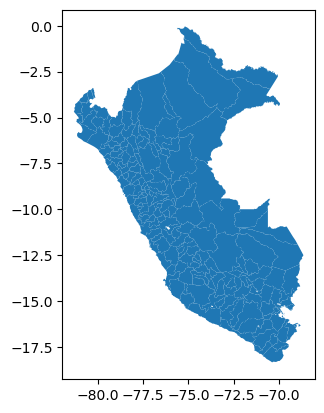

In [21]:
Peru.plot()

In [33]:
print(Peru)

    IDDPTO DEPARTAMEN IDPROV         PROVINCIA               CAPITAL FUENTE  \
0       01   AMAZONAS   0101       CHACHAPOYAS           CHACHAPOYAS   INEI   
1       01   AMAZONAS   0102             BAGUA                 BAGUA   INEI   
2       01   AMAZONAS   0103           BONGARA              JUMBILLA   INEI   
3       01   AMAZONAS   0104      CONDORCANQUI  SANTA MARIA DE NIEVA   INEI   
4       01   AMAZONAS   0105              LUYA                 LAMUD   INEI   
..     ...        ...    ...               ...                   ...    ...   
191     24     TUMBES   2403         ZARUMILLA             ZARUMILLA   INEI   
192     25    UCAYALI   2501  CORONEL PORTILLO              PUCALLPA   INEI   
193     25    UCAYALI   2502           ATALAYA               ATALAYA   INEI   
194     25    UCAYALI   2503        PADRE ABAD              AGUAYTIA   INEI   
195     25    UCAYALI   2504             PURUS             ESPERANZA   INEI   

                                              geome

In [22]:
Peru.columns

Index(['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'CAPITAL', 'FUENTE',
       'geometry'],
      dtype='object')

In [23]:
theMap=Peru.merge(subset_df,on='DEPARTAMEN')
# here it is:
theMap

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,V213,Total_minMax
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",7,4.615385
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",7,4.615385
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",7,4.615385
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",7,4.615385
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",7,4.615385
...,...,...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",6,3.846154
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",14,10.000000
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",14,10.000000
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",14,10.000000


In [24]:
#CLOROPLETHS
theMap['Total_minMax'].describe()

count    196.000000
mean       3.532182
std        2.786788
min        0.000000
25%        1.538462
50%        2.307692
75%        5.384615
max       10.000000
Name: Total_minMax, dtype: float64

<Axes: >

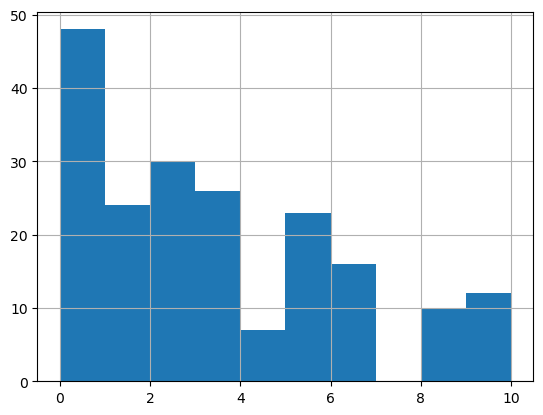

In [25]:
theMap.Total_minMax.hist()

<Axes: >

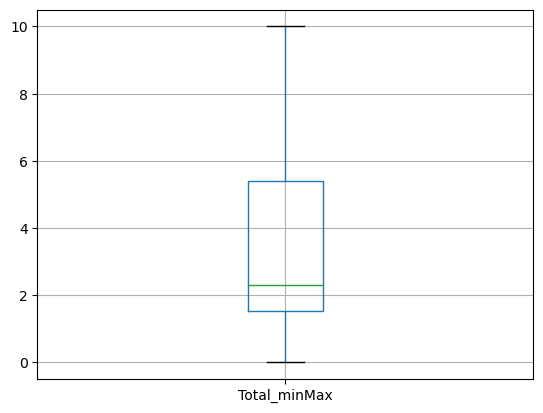

In [26]:
theMap.boxplot(column=['Total_minMax'])

In [27]:
#pip install numba

In [28]:
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMap.Total_minMax
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

In [29]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

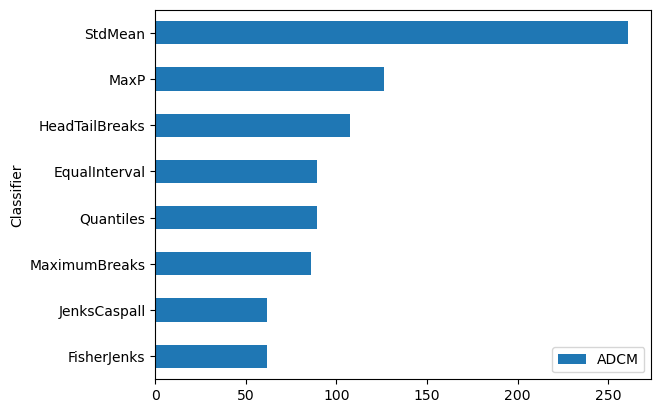

In [30]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [31]:
theMap['Total_mb5'] = mb5.yb

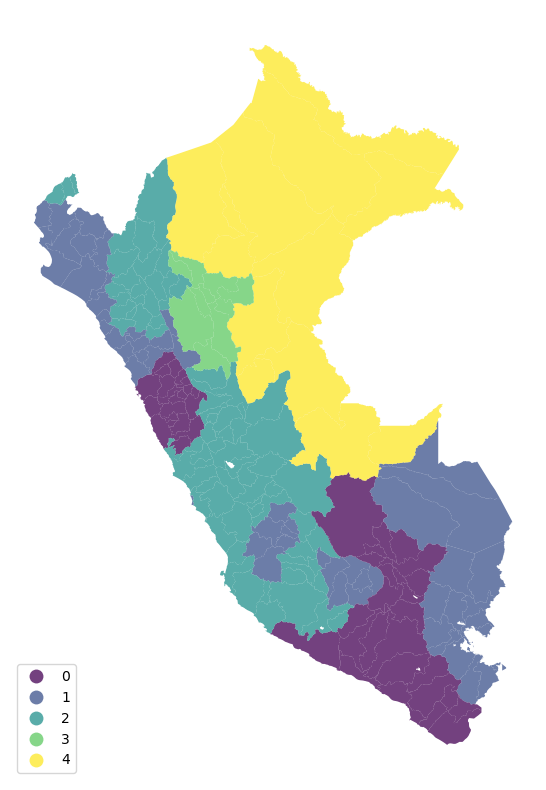

In [32]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMap.plot(column='Total_mb5', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [70]:
theMap=theMap.to_crs(8858)

In [73]:
theMap['centroid']=theMap.geometry.centroid

<Axes: >

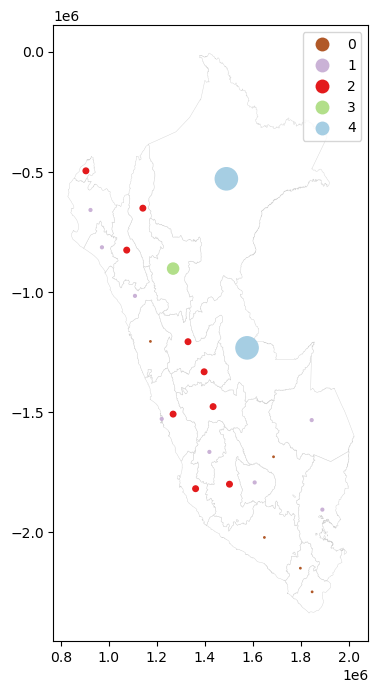

In [77]:
# just the plot
base=theMap.plot(facecolor='white',
                     edgecolor='lightgrey',
                     linewidth=0.3,
                     figsize=(8,8))

# another column, with the size of the POINTS (based on "Total_ei5")
theMap["sizeOfMarker_ei5"]=[4**exp for exp in theMap["Total_mb5"]]

# now, plotting the centroids (declared as the geometry)!!!
theMap.set_geometry("centroid").plot(column="Total_mb5",
                                         categorical=True,
                                         markersize=theMap["sizeOfMarker_ei5"],
                                         cmap='Paired_r',
                                         legend=True,ax=base)